# Import the libraries

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Since the data have no file headers, we have to mention the column names
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv("pima-indians-diabetes.data", names= colnames)

In [3]:
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#To check if any column column has number other than numeric data
# applymap is pandas dataframe function that applies the np.isreal function columnwise
data[~data.applymap(np.isreal).all(1)]

,preg,plas,pres,skin,test,mass,pedi,age,class


In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
preg,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
plas,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
pres,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
skin,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
test,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
mass,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
pedi,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
class,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
#Class column in data has values 0&1 wherein 0 indicates non-diabetic and 1 indicates diabetic
#Now let us look at the target columns "class" to see how it is distributed among other columns in dataset
data.groupby(["class"]).count()
#Observing the output, it will shows that most of them are non-diabetic which implies that model we will be predicting will
#shows better performance to predict the non-diabetic 

,preg,plas,pres,skin,test,mass,pedi,age
class,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


### Visualization Analysis

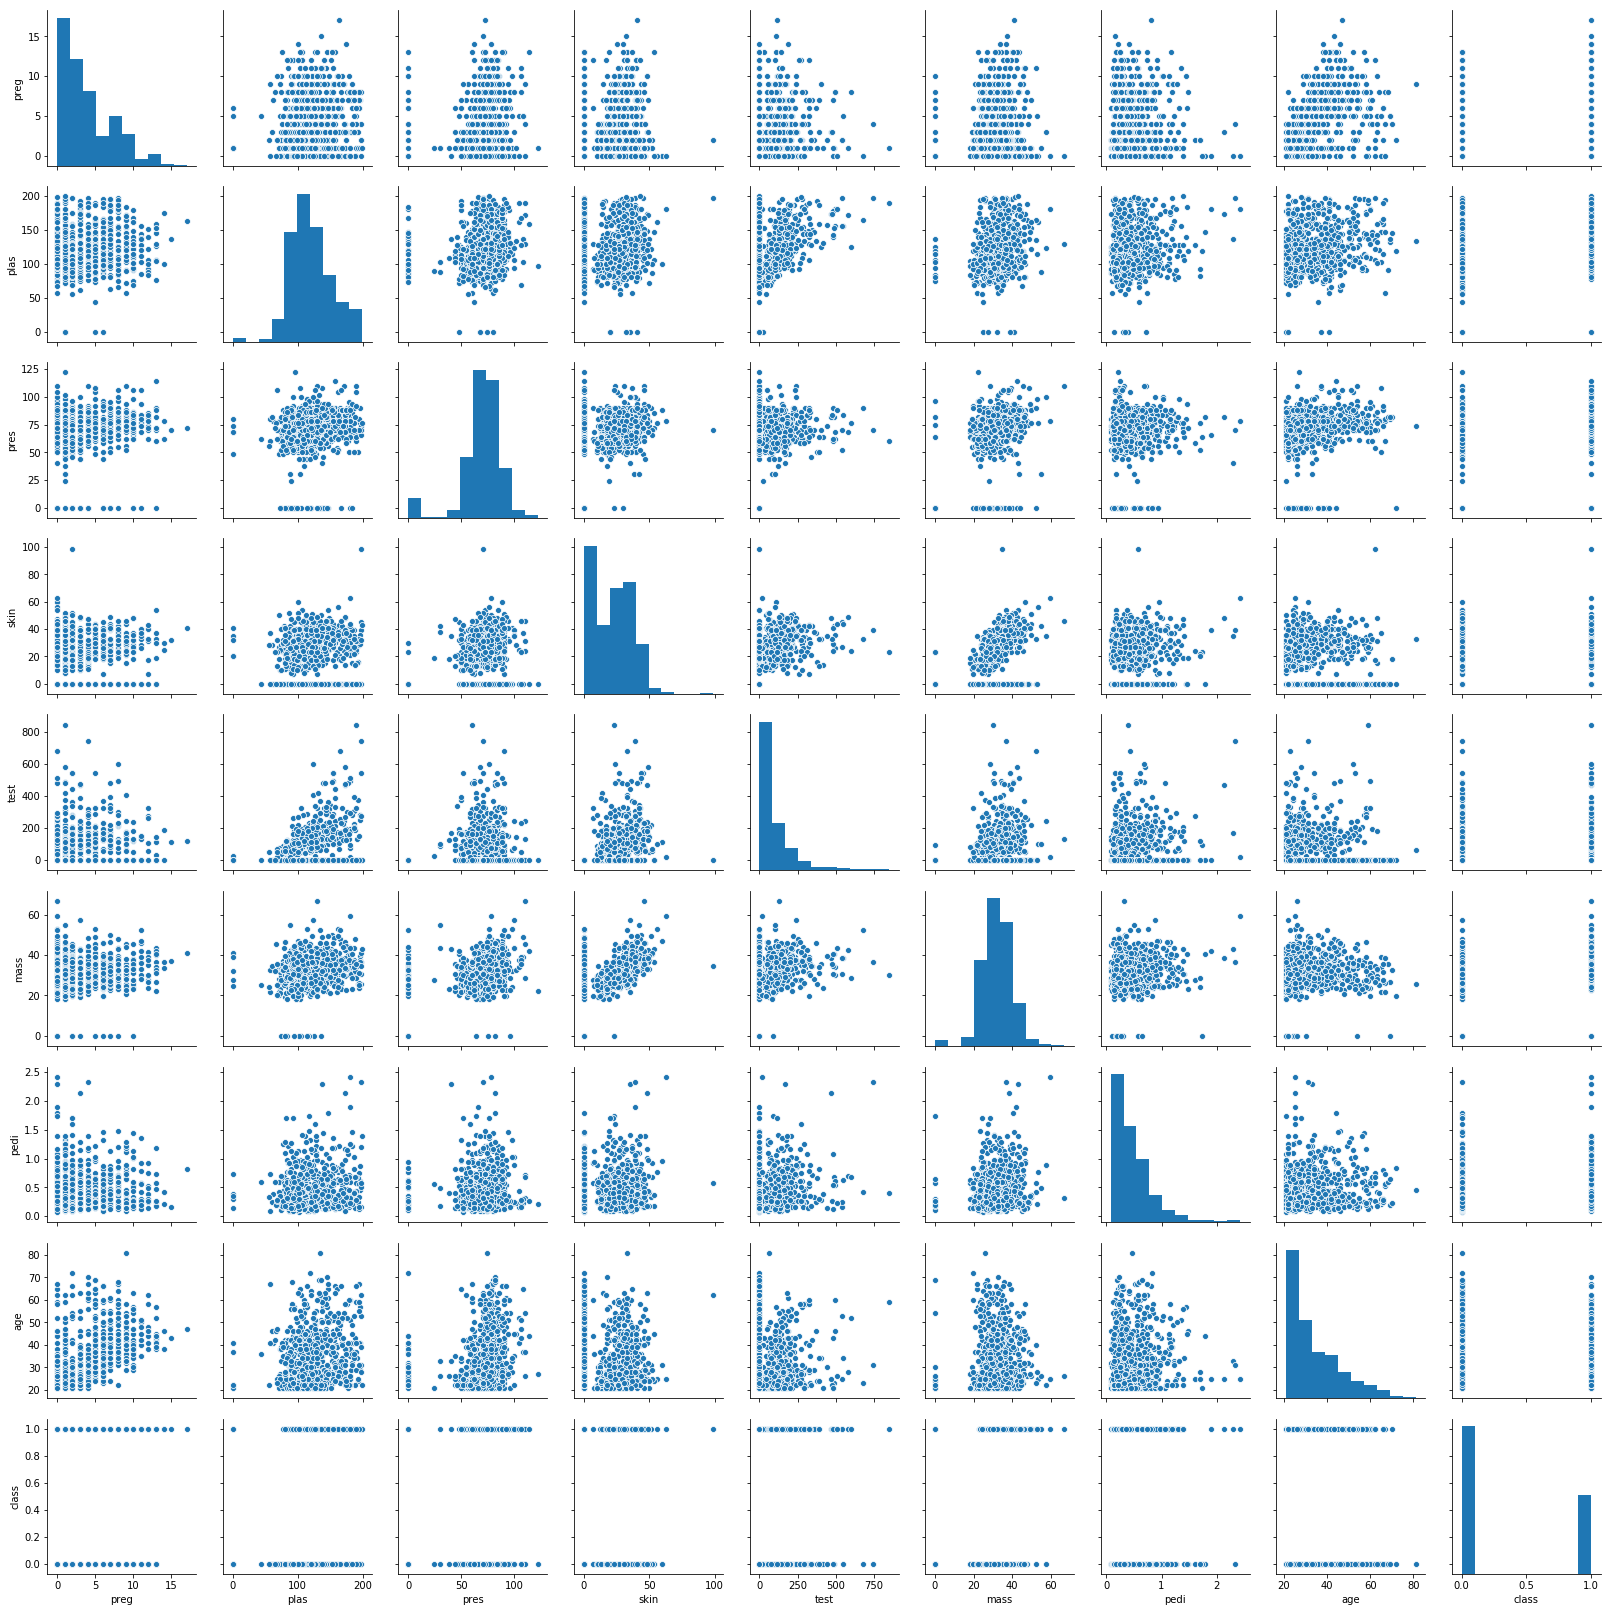

In [7]:
sns.pairplot(data)

In [8]:
#### OBSERVATIONS
#Data for all attributes are skewed , escpecially for test where it has long tails

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.

## Import Logistic Regression Libraries

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Training and Test Data

In [10]:
data_array = data.values
X = data.iloc[:,0:8]  #independent variable
y = data.iloc[:,8]   #target/dependent variable
test_size = 0.30    #taking ratio of 70:30 for training and test data
seed = 1
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size,random_state=seed)

In [11]:
#Let's fit the model on 30%
model = LogisticRegression()
model.fit(X_train,y_train)
y_Predict = model.predict(X_test)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [12]:
#Model evaluating using Consfused matrix
#For that we need to import Metrics
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_Predict)
cnf_matrix

array([[132,  14],
       [ 38,  47]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

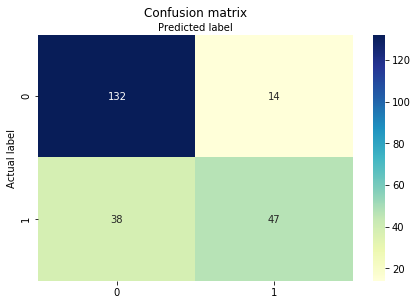

In [13]:
#Visualizing using heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

## Accuracy,Precision and Recall

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, y_Predict))
print("Precision:",metrics.precision_score(y_test, y_Predict))
print("Recall:",metrics.recall_score(y_test, y_Predict))

Accuracy: 0.7748917748917749
Precision: 0.7704918032786885
Recall: 0.5529411764705883


In [15]:
from sklearn.metrics import roc_auc_score
rc=roc_auc_score(y_test,y_Predict)
rc

0.7285253827558421